In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm


sns.set_theme(
    style='whitegrid',       # 배경 스타일 (grid 포함)
    font='BM Hanna Pro',     # 폰트
    rc={
        'axes.unicode_minus': False,  # 마이너스 기호 깨짐 방지
        'figure.figsize': (12, 6),    # 그래프 크기 설정
        'axes.labelsize': 14,         # 축 레이블 크기
        'xtick.labelsize': 12,        # x축 눈금 크기
        'ytick.labelsize': 12,        # y축 눈금 크기
        'legend.fontsize': 12,        # 범례 폰트 크기
        'axes.titleweight': 'bold',   # 제목 굵게
        'axes.titlesize': 16          # 제목 크기
    }
)

%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv("../data/customer_personality.csv", sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
# 각 컬럼의 고윳값 확인
for col in data.columns:
    unique_values = data[col].unique()
    unique_str = ', '.join(map(str, unique_values[:5]))  # 처음 5개만 표시
    if len(unique_values) > 10:
        unique_str += ", ..."  # 너무 많으면 생략 표시
    print(f"{col:<15}: {unique_str}")

ID             : 5524, 2174, 4141, 6182, 5324, ...
Year_Birth     : 1957, 1954, 1965, 1984, 1981, ...
Education      : Graduation, PhD, Master, Basic, 2n Cycle
Marital_Status : Single, Together, Married, Divorced, Widow
Income         : 58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...
Kidhome        : 0, 1, 2
Teenhome       : 0, 1, 2
Dt_Customer    : 04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, ...
Recency        : 58, 38, 26, 94, 16, ...
MntWines       : 635, 11, 426, 173, 520, ...
MntFruits      : 88, 1, 49, 4, 43, ...
MntMeatProducts: 546, 6, 127, 20, 118, ...
MntFishProducts: 172, 2, 111, 10, 46, ...
MntSweetProducts: 88, 1, 21, 3, 27, ...
MntGoldProds   : 88, 6, 42, 5, 15, ...
NumDealsPurchases: 3, 2, 1, 5, 4, ...
NumWebPurchases: 8, 1, 2, 5, 6, ...
NumCatalogPurchases: 10, 1, 2, 0, 3, ...
NumStorePurchases: 4, 2, 10, 6, 7, ...
NumWebVisitsMonth: 7, 5, 4, 6, 8, ...
AcceptedCmp3   : 0, 1
AcceptedCmp4   : 0, 1
AcceptedCmp5   : 0, 1
AcceptedCmp1   : 0, 1
AcceptedCmp2  

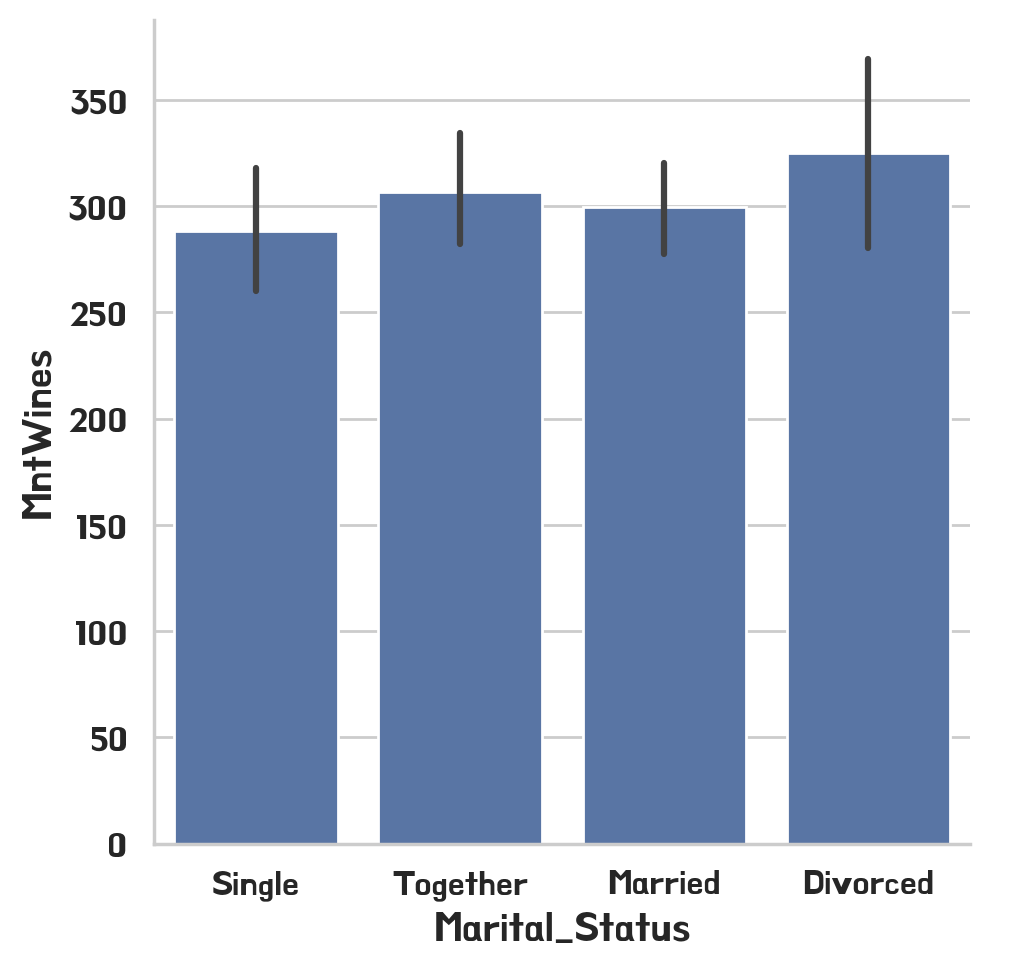

In [4]:
temp = data.query('Marital_Status in ["Single", "Together", "Married", "Divorced"]')

sns.catplot(data=temp, x='Marital_Status', y='MntWines', kind='bar')

plt.show()

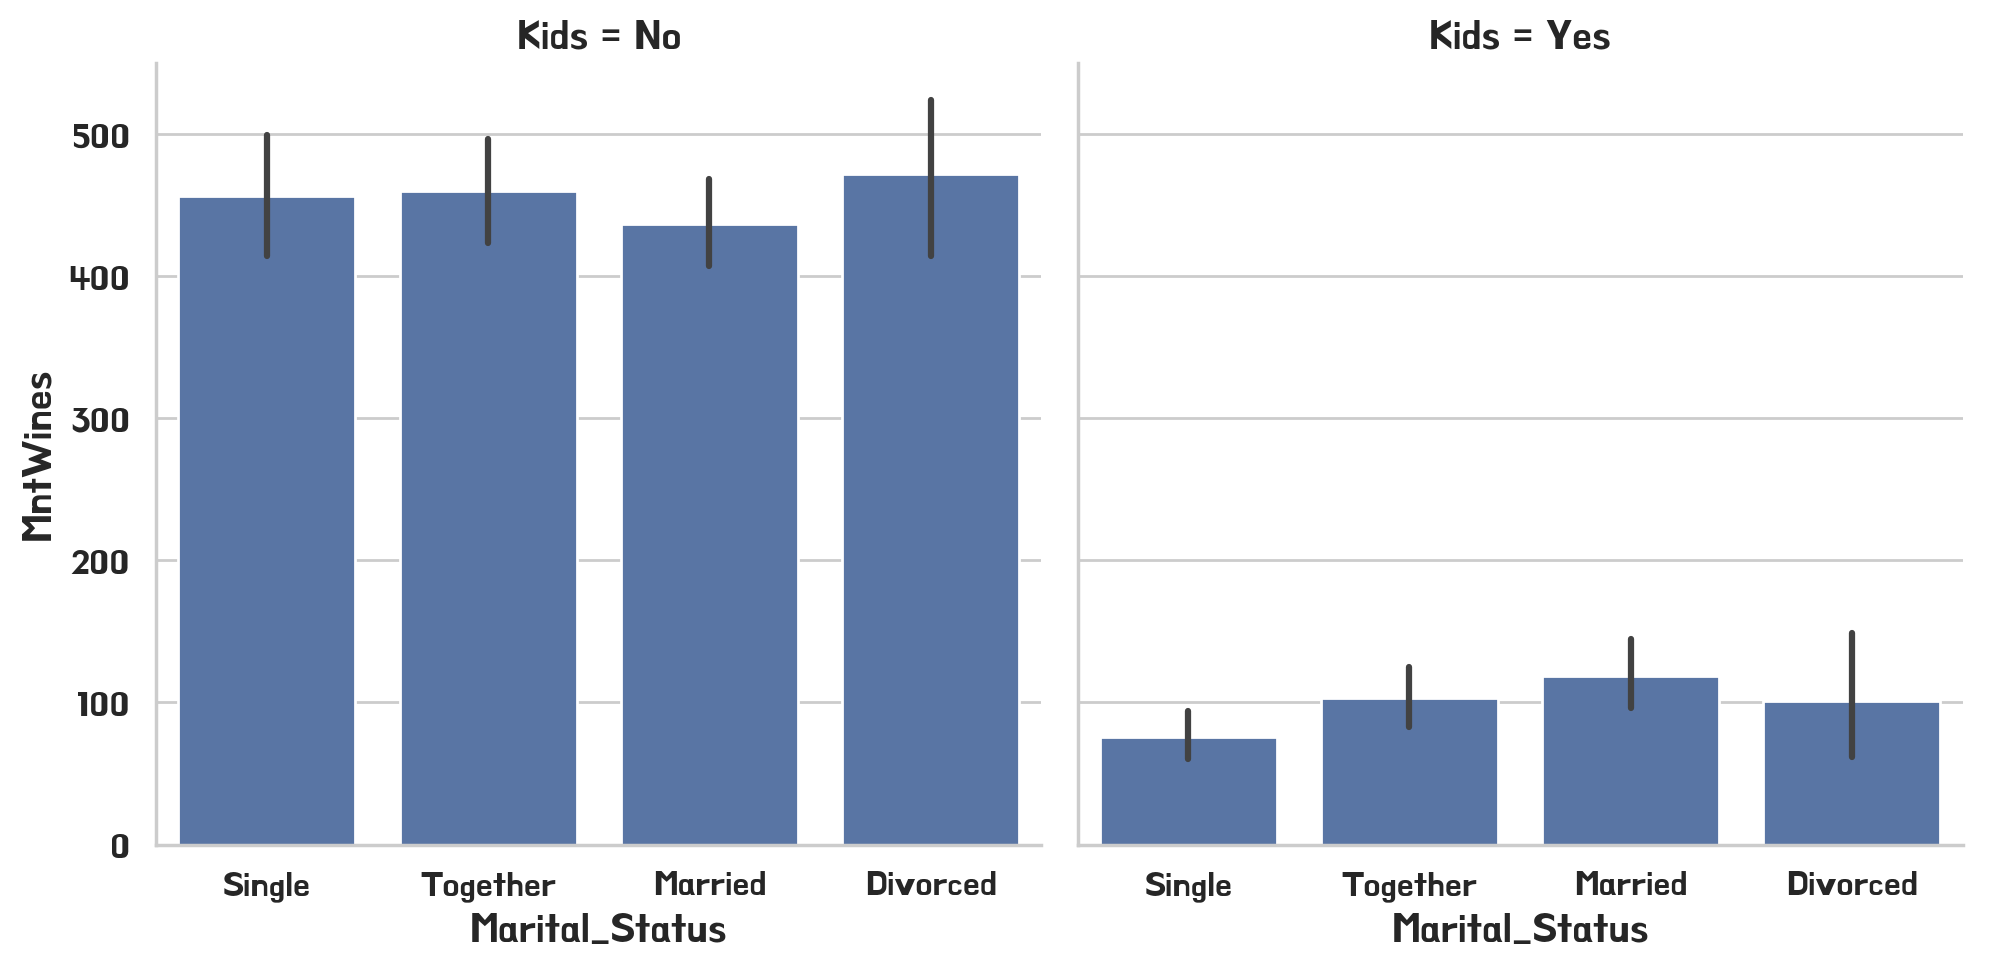

In [5]:
temp = temp.copy()
temp['Kids'] = temp['Kidhome'].apply(lambda x: 'Yes' if x >= 1 else 'No')

sns.catplot(data=temp, x='Marital_Status', y='MntWines', kind='bar', col='Kids')

plt.show()

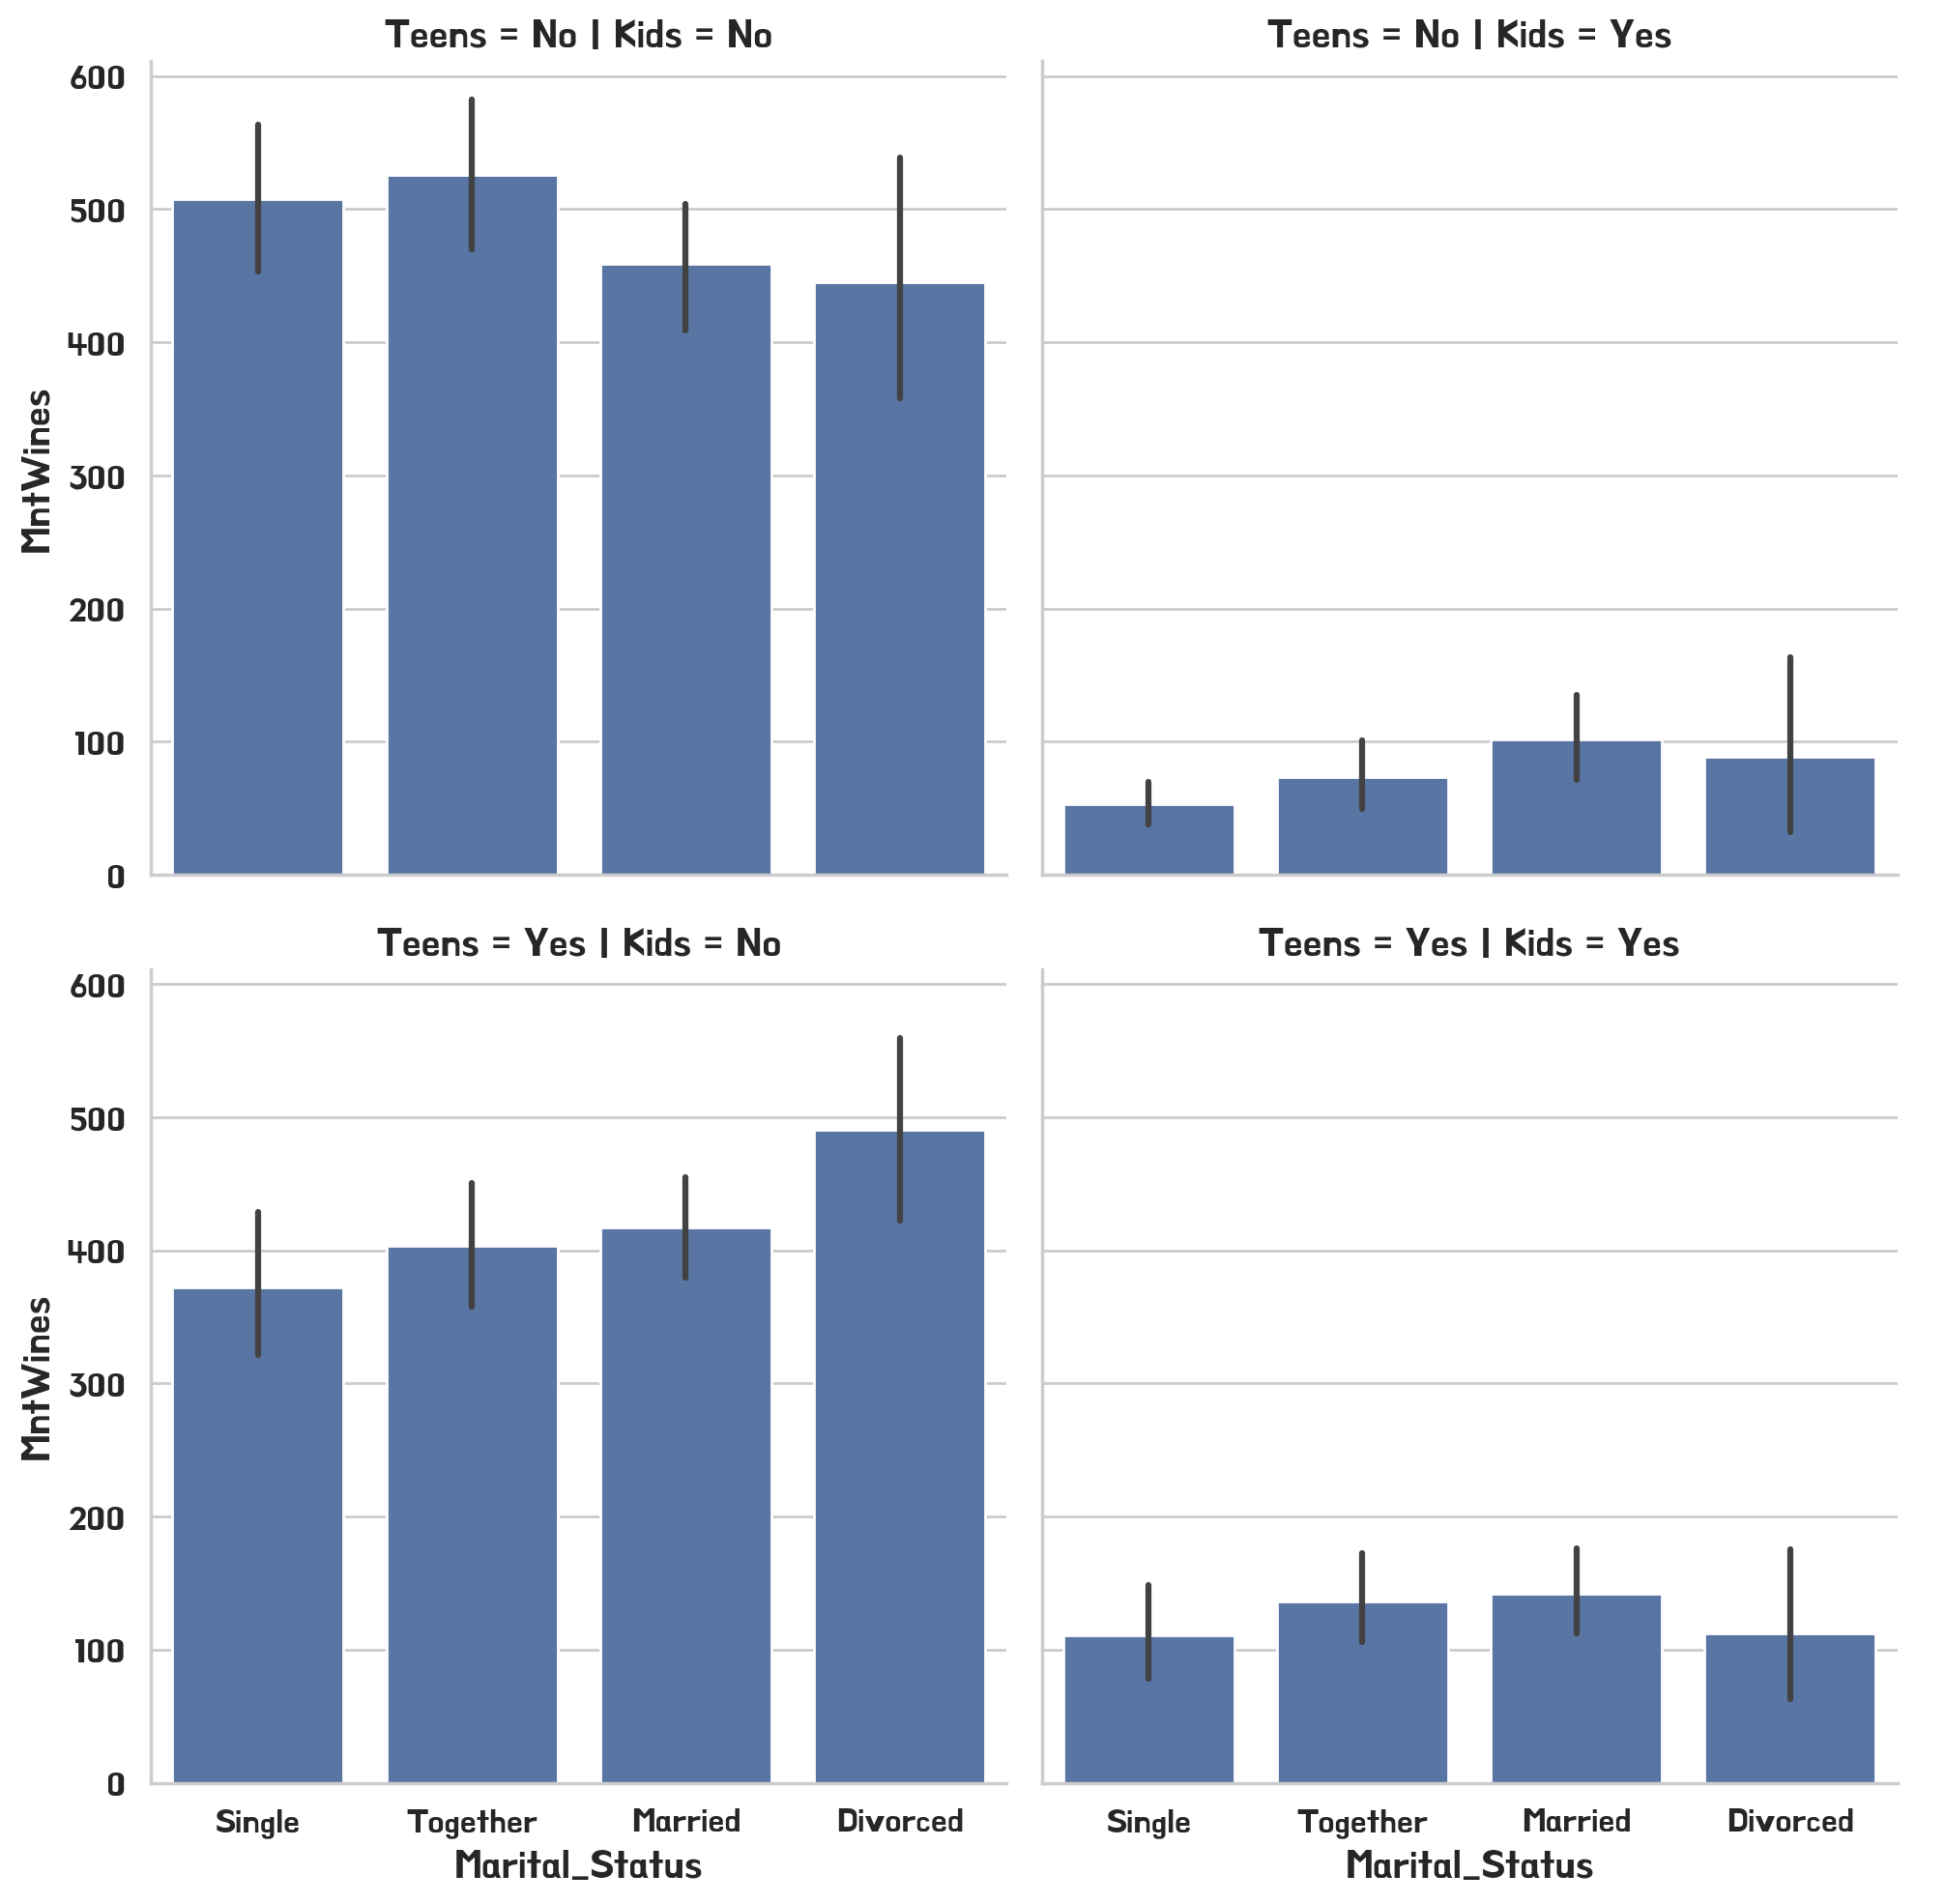

In [6]:
temp['Teens'] = temp['Teenhome'].apply(lambda x: 'Yes' if x >= 1 else 'No')

sns.catplot(data=temp, x='Marital_Status', y='MntWines', kind='bar', col='Kids', row='Teens')

plt.show()

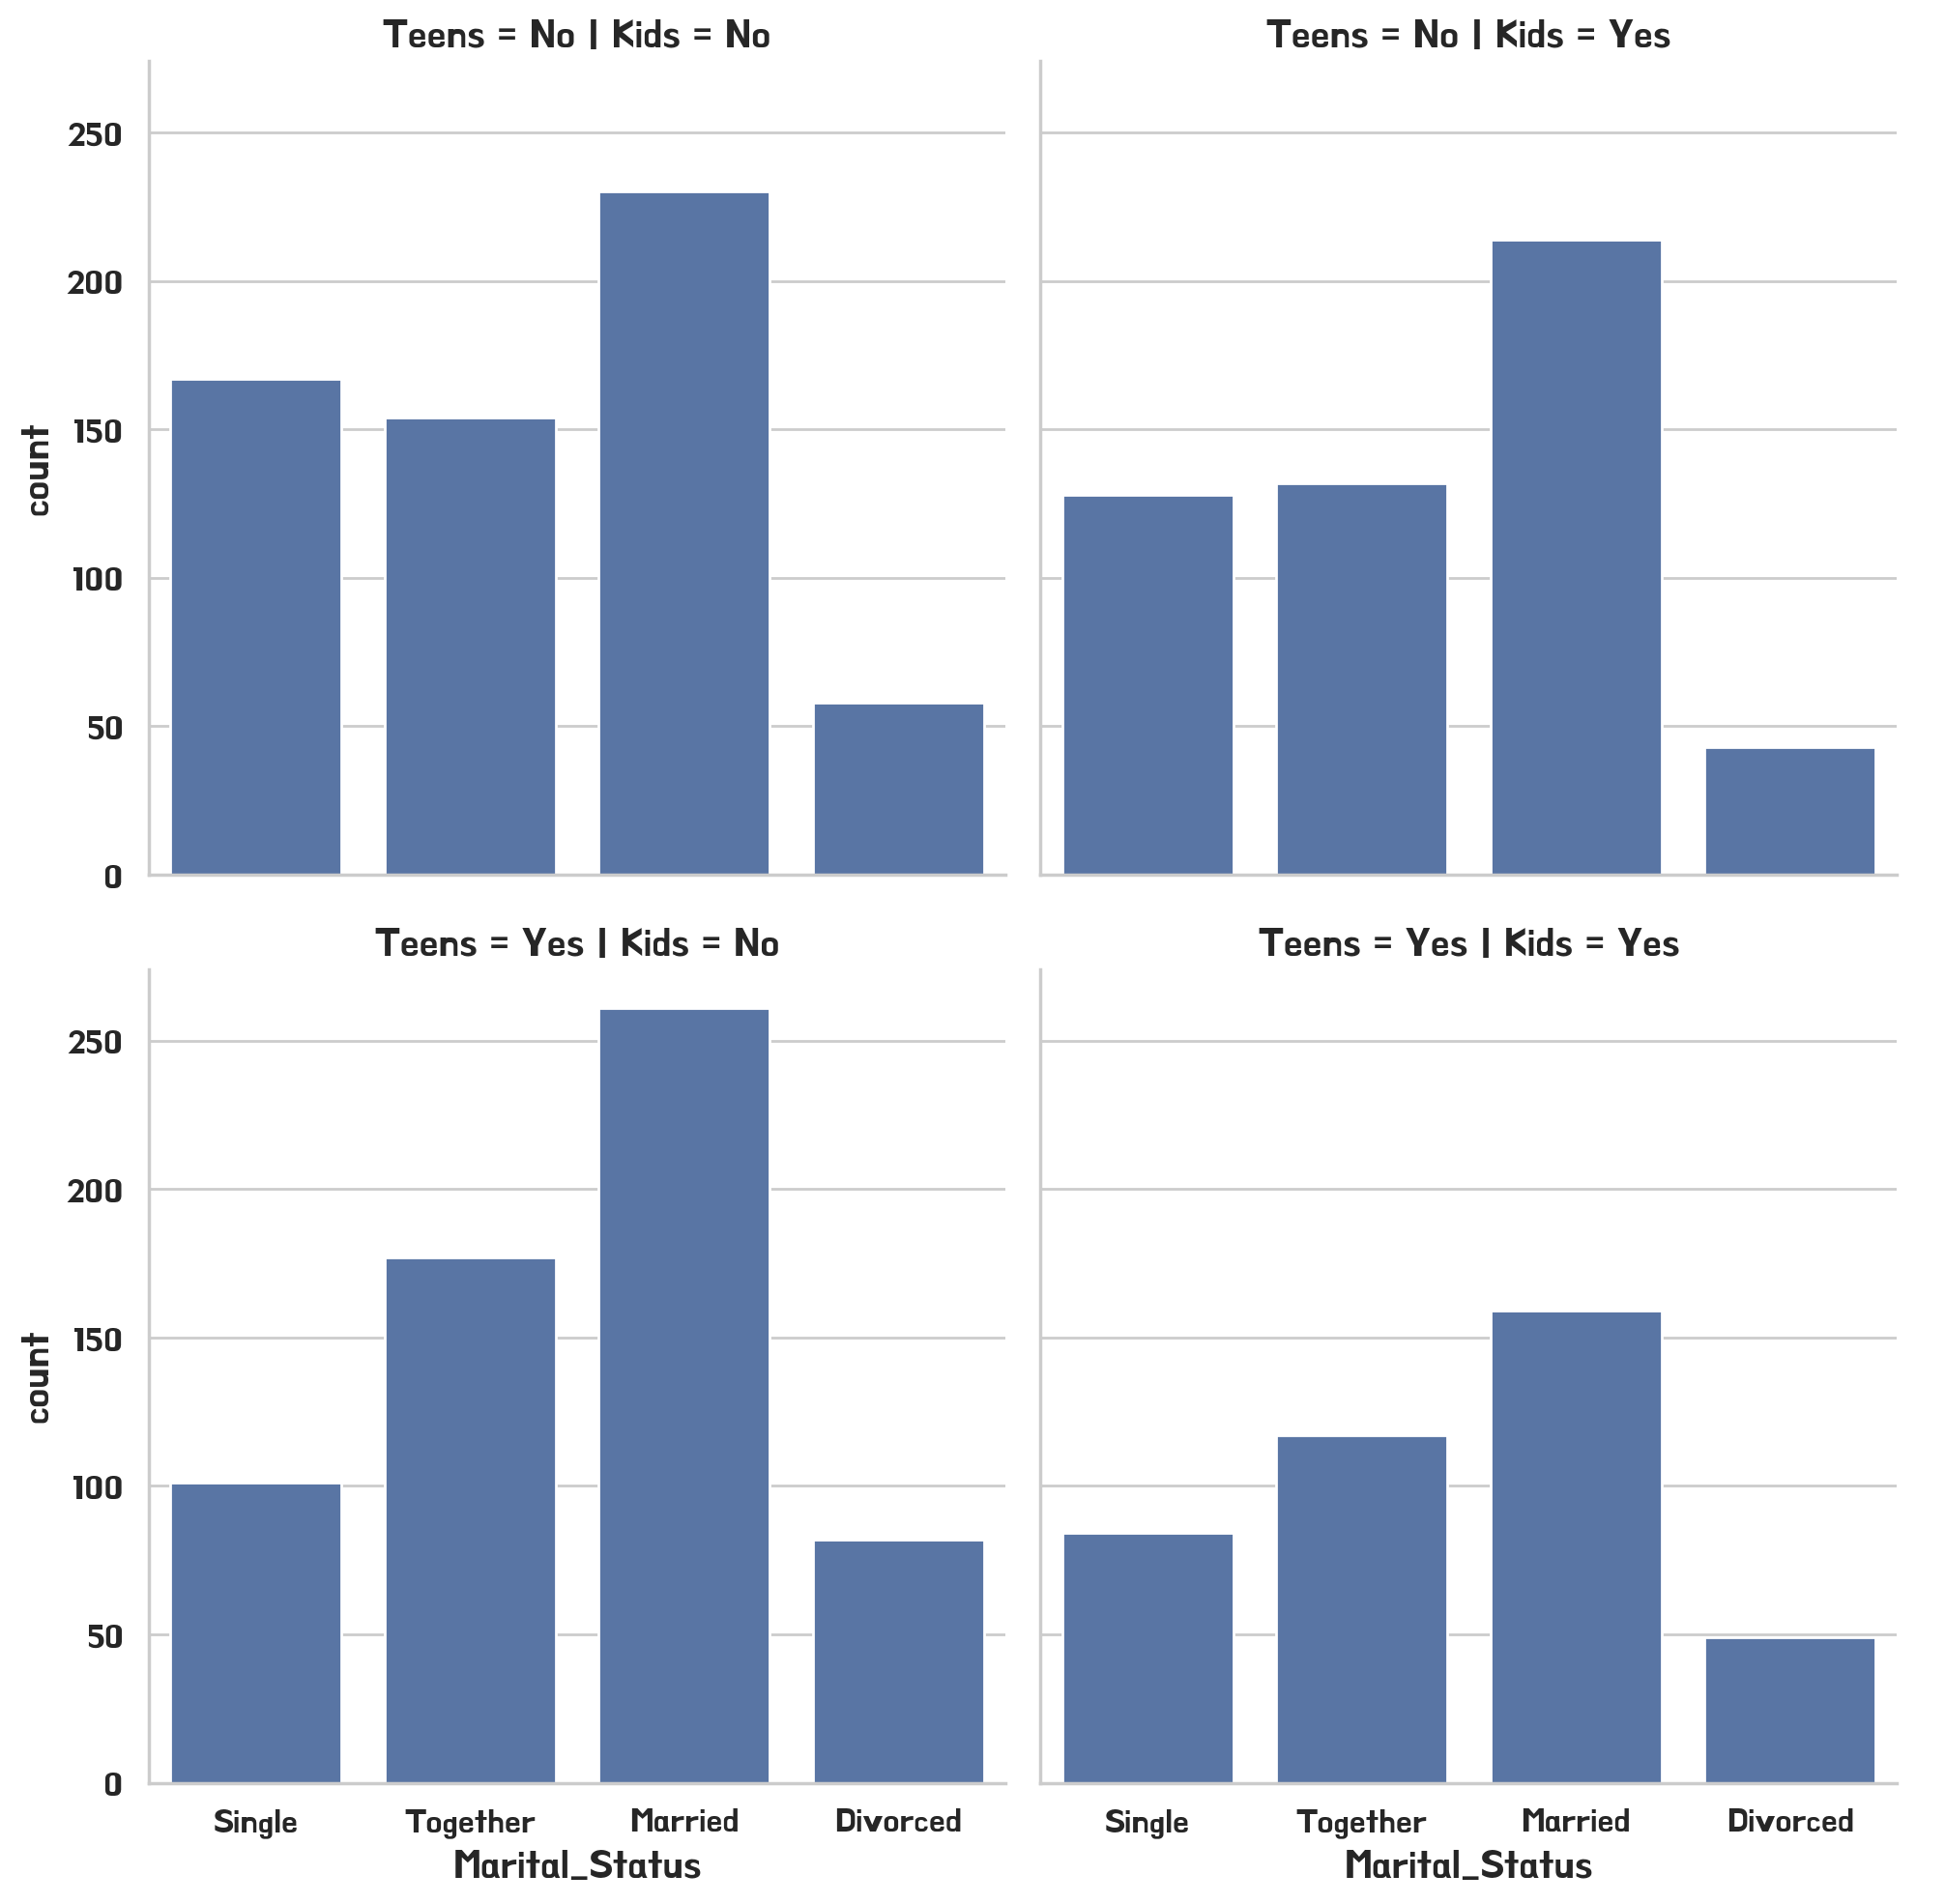

In [7]:
sns.catplot(data=temp, x='Marital_Status', kind='count', col='Kids', row='Teens')

plt.show()

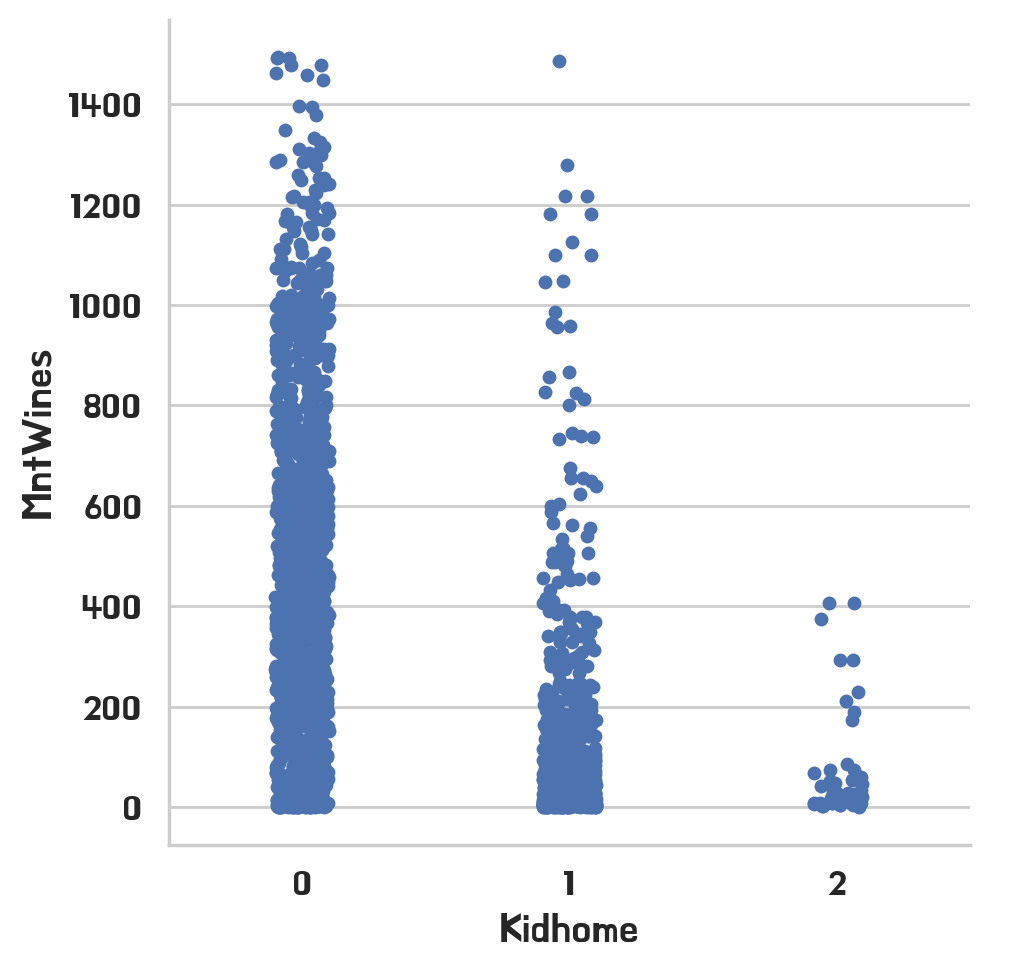

In [8]:
sns.catplot(data=data, x='Kidhome', y='MntWines', kind='strip')

plt.show()

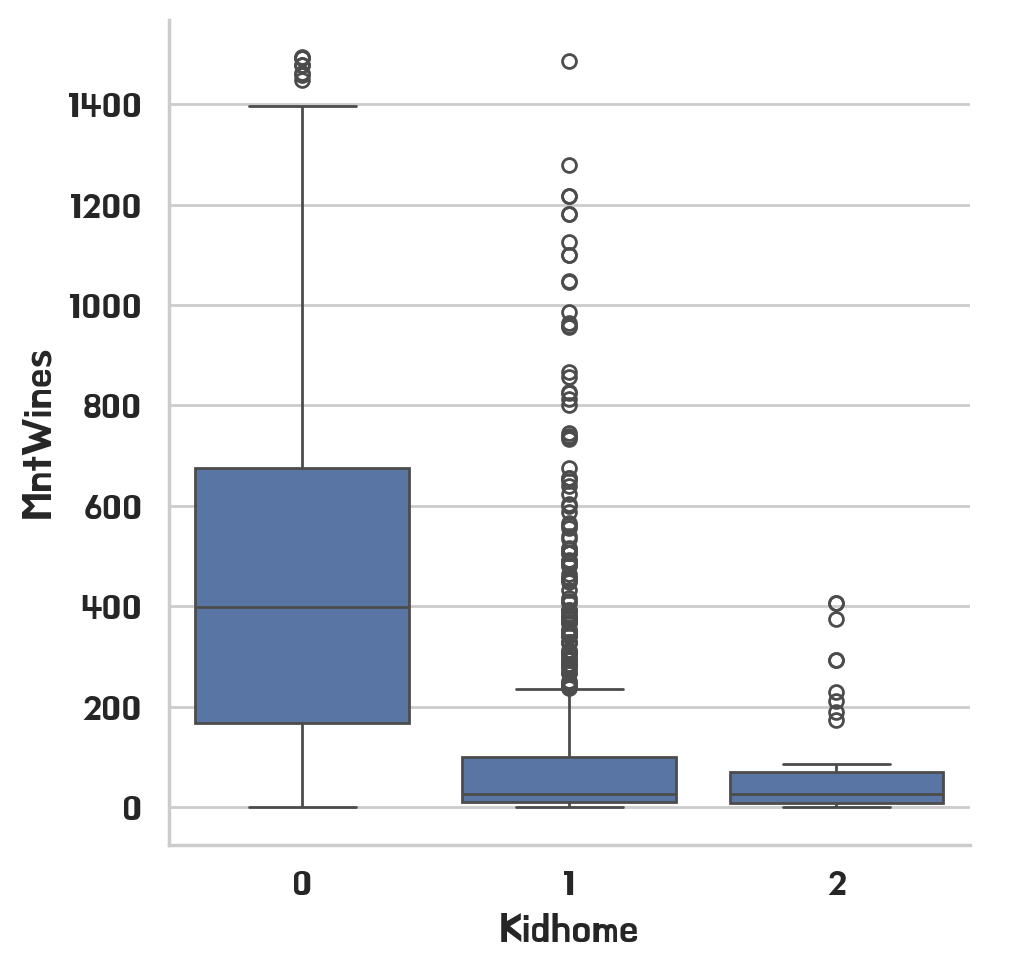

In [9]:
sns.catplot(data=data, x='Kidhome', y='MntWines', kind='box')

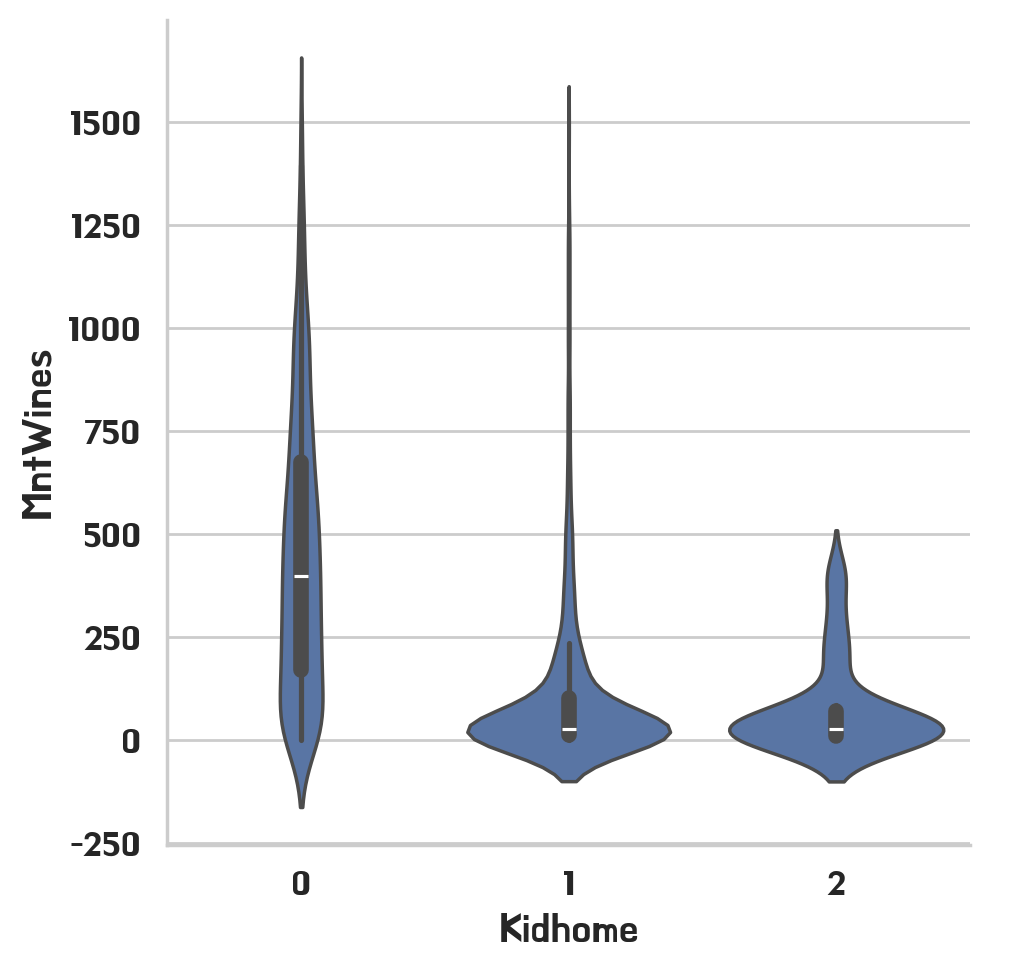

In [10]:
sns.catplot(data=data, x='Kidhome', y='MntWines', kind='violin')

---
---
---
---

In [11]:
data1 = pd.read_csv("../data/student_exam.csv")

data1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


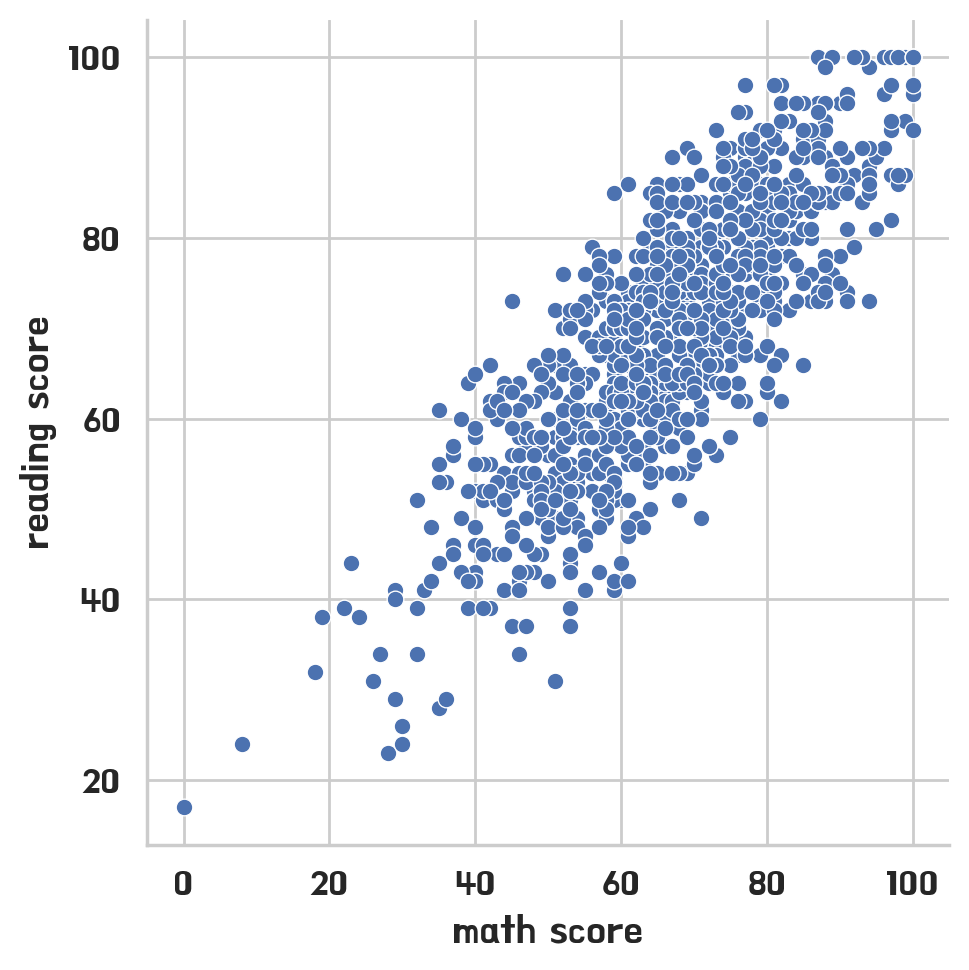

In [12]:
sns.relplot(data=data1, x='math score', y='reading score', kind='scatter')

plt.show()

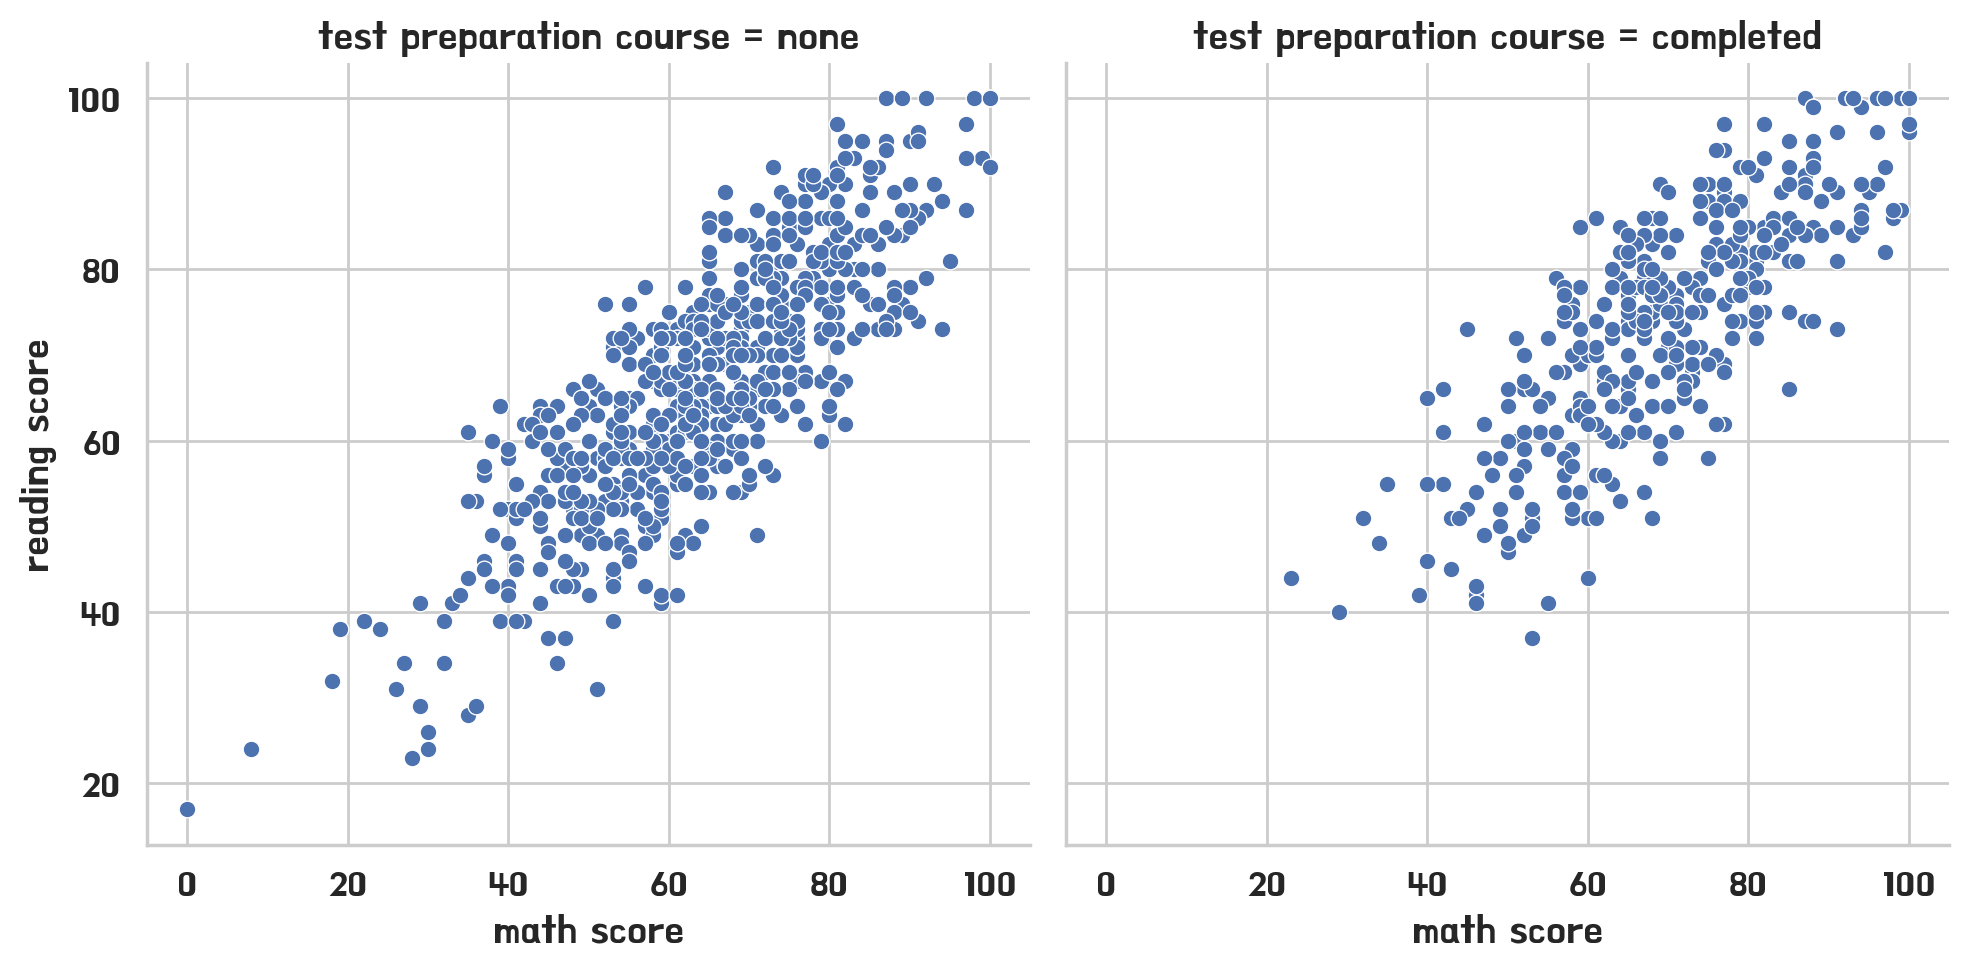

In [13]:
sns.relplot(data=data1, x='math score', y='reading score', kind='scatter', col='test preparation course')

plt.show()

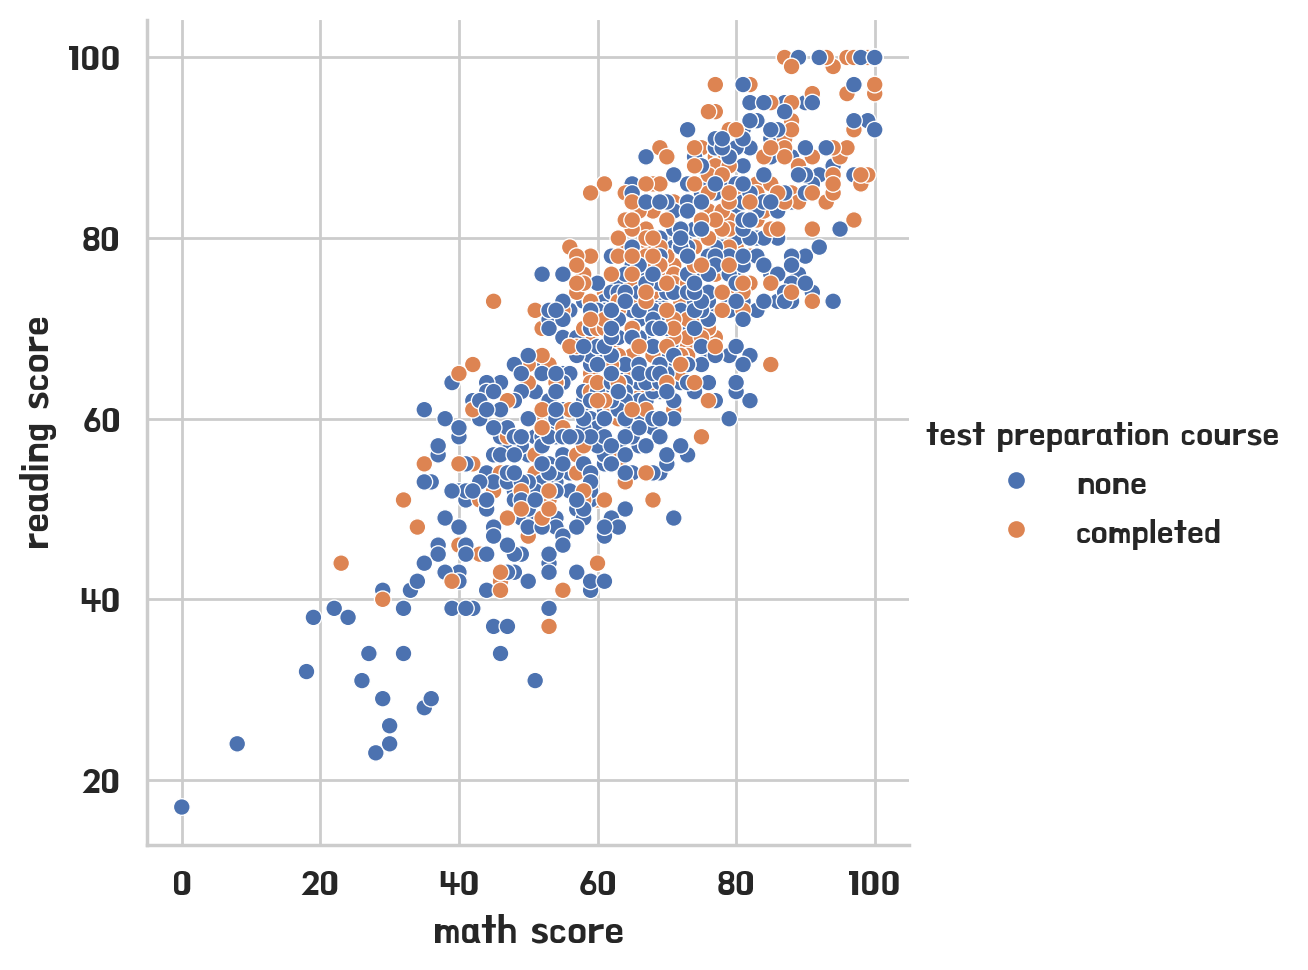

In [14]:
sns.relplot(data=data1, x='math score', y='reading score', kind='scatter', hue='test preparation course')

plt.show()

In [15]:
data2 = pd.read_csv('../data/amazon_bestsellers.csv')
data2

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [16]:
# 각 컬럼의 고윳값 확인
for col in data2.columns:
    unique_values = data2[col].unique()
    unique_str = ', '.join(map(str, unique_values[:5]))  # 처음 5개만 표시
    if len(unique_values) > 10:
        unique_str += ", ..."  # 너무 많으면 생략 표시
    print(f"{col:<15}: {unique_str}")

Name           : 10-Day Green Smoothie Cleanse, 11/22/63: A Novel, 12 Rules for Life: An Antidote to Chaos, 1984 (Signet Classics), 5,000 Awesome Facts (About Everything!) (National Geographic Kids), ...
Author         : JJ Smith, Stephen King, Jordan B. Peterson, George Orwell, National Geographic Kids, ...
User Rating    : 4.7, 4.6, 4.8, 4.4, 4.5, ...
Reviews        : 17350, 2052, 18979, 21424, 7665, ...
Price          : 8, 22, 15, 6, 12, ...
Year           : 2016, 2011, 2018, 2017, 2019, ...
Genre          : Non Fiction, Fiction


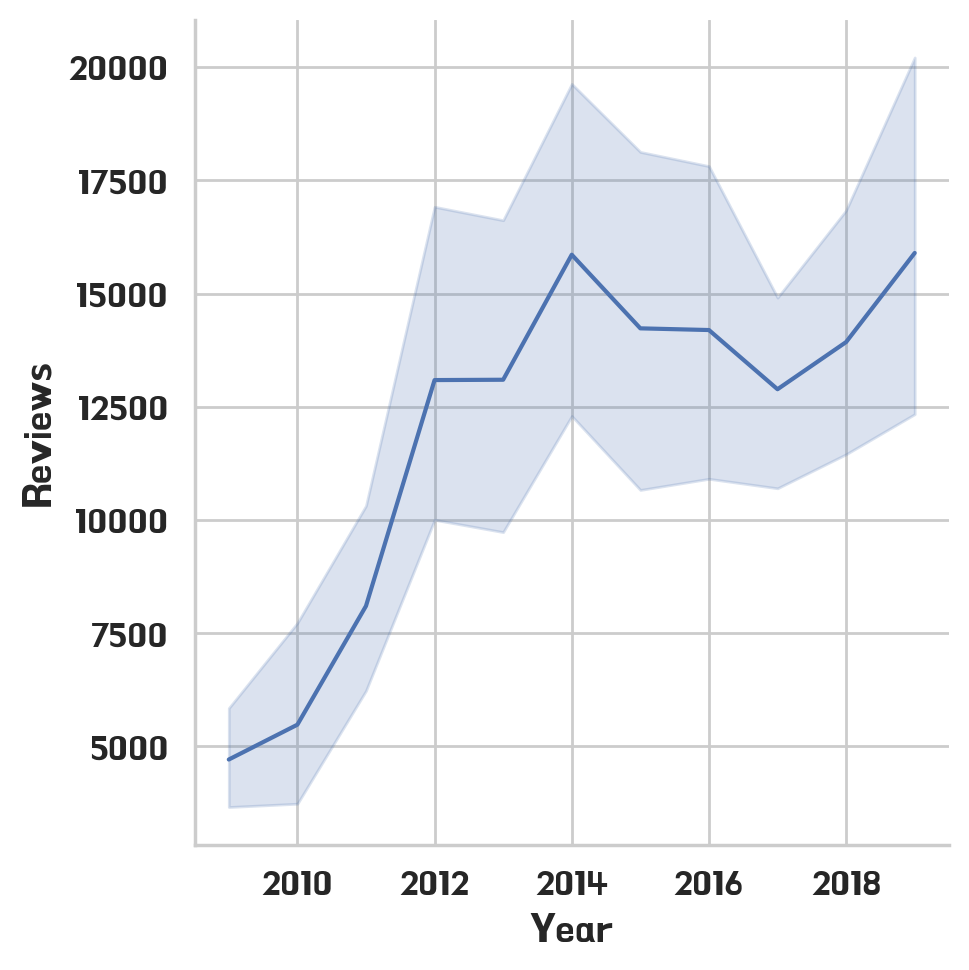

In [17]:
sns.relplot(data=data2, x='Year', y='Reviews', kind='line')

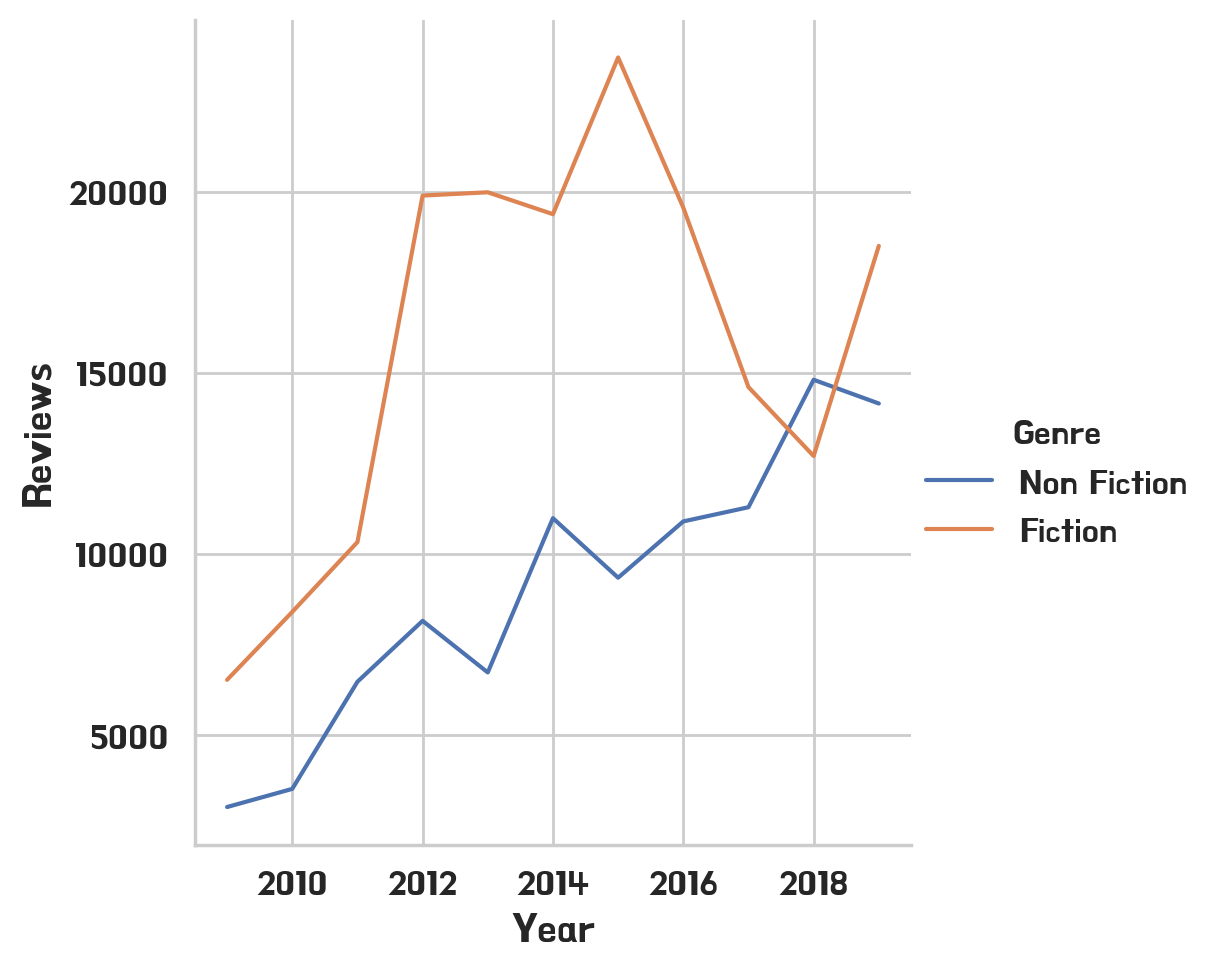

In [18]:
sns.relplot(data=data2, x='Year', y='Reviews', errorbar=None, hue='Genre', kind='line')

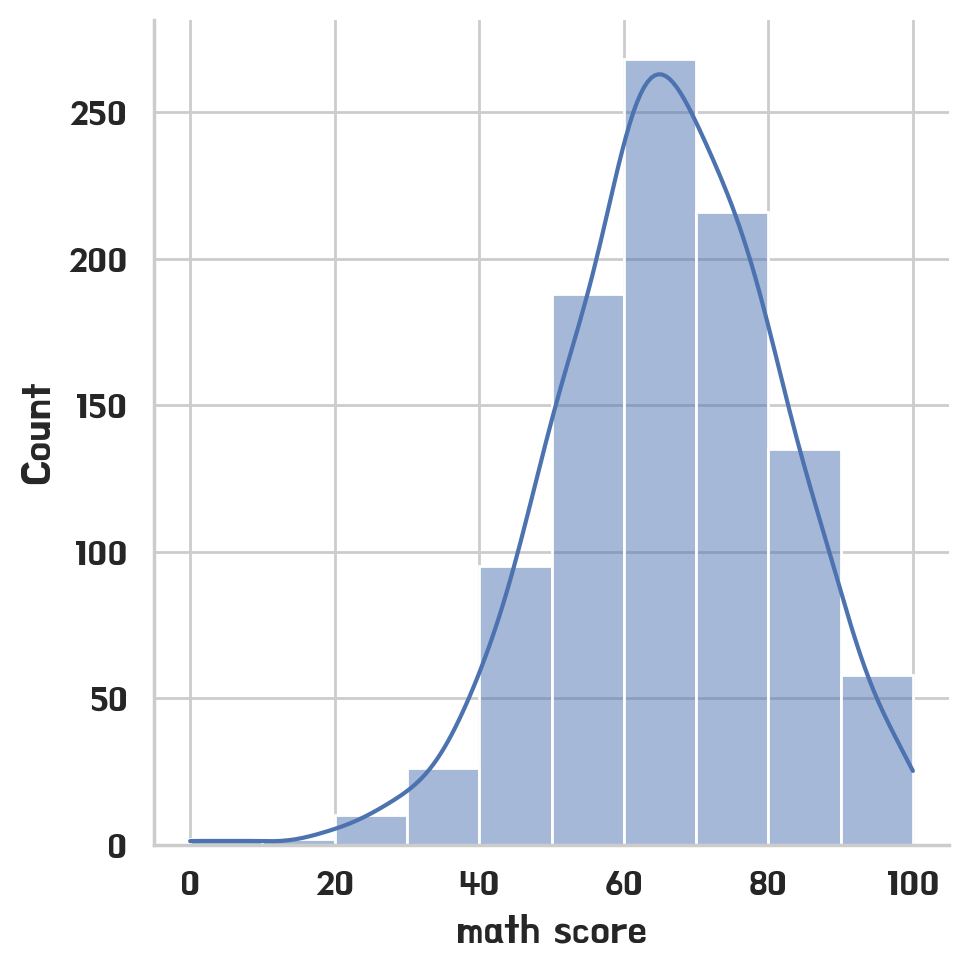

In [19]:
sns.displot(data=data1, x='math score', kind='hist', bins=10, kde=True)

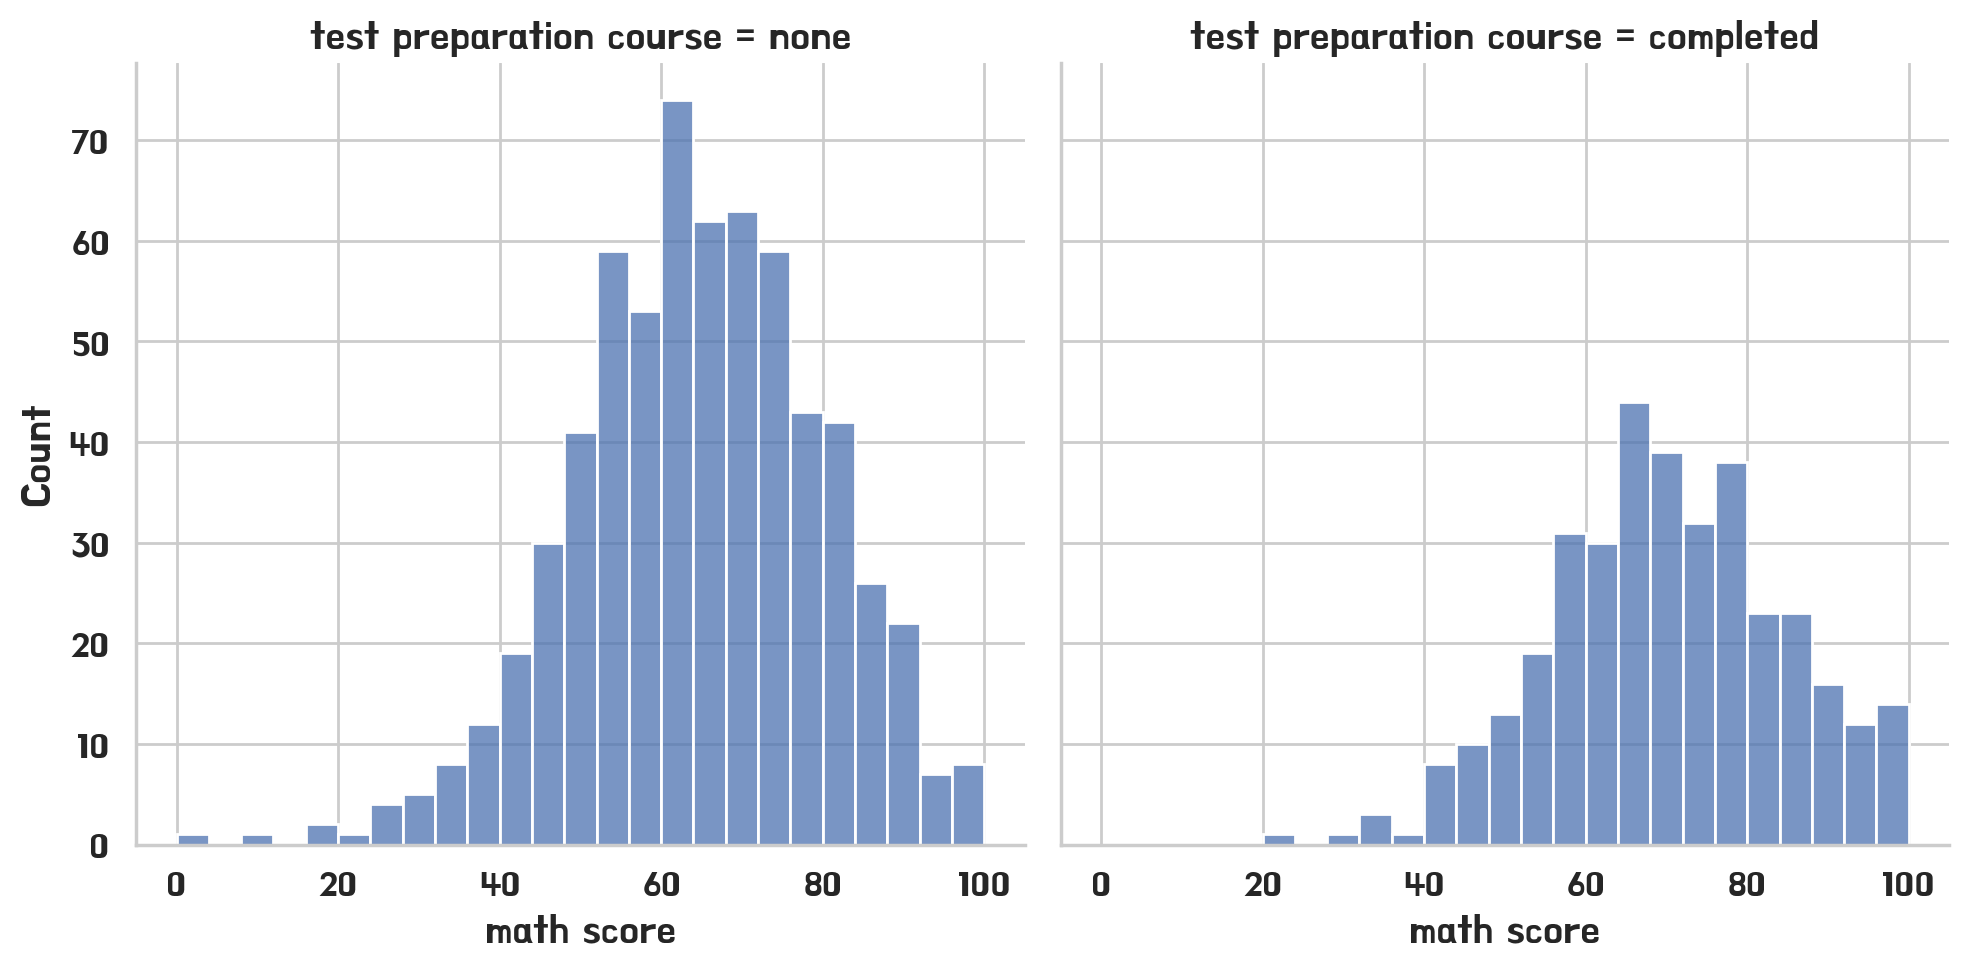

In [20]:
sns.displot(data=data1, x='math score', kind='hist', col='test preparation course')

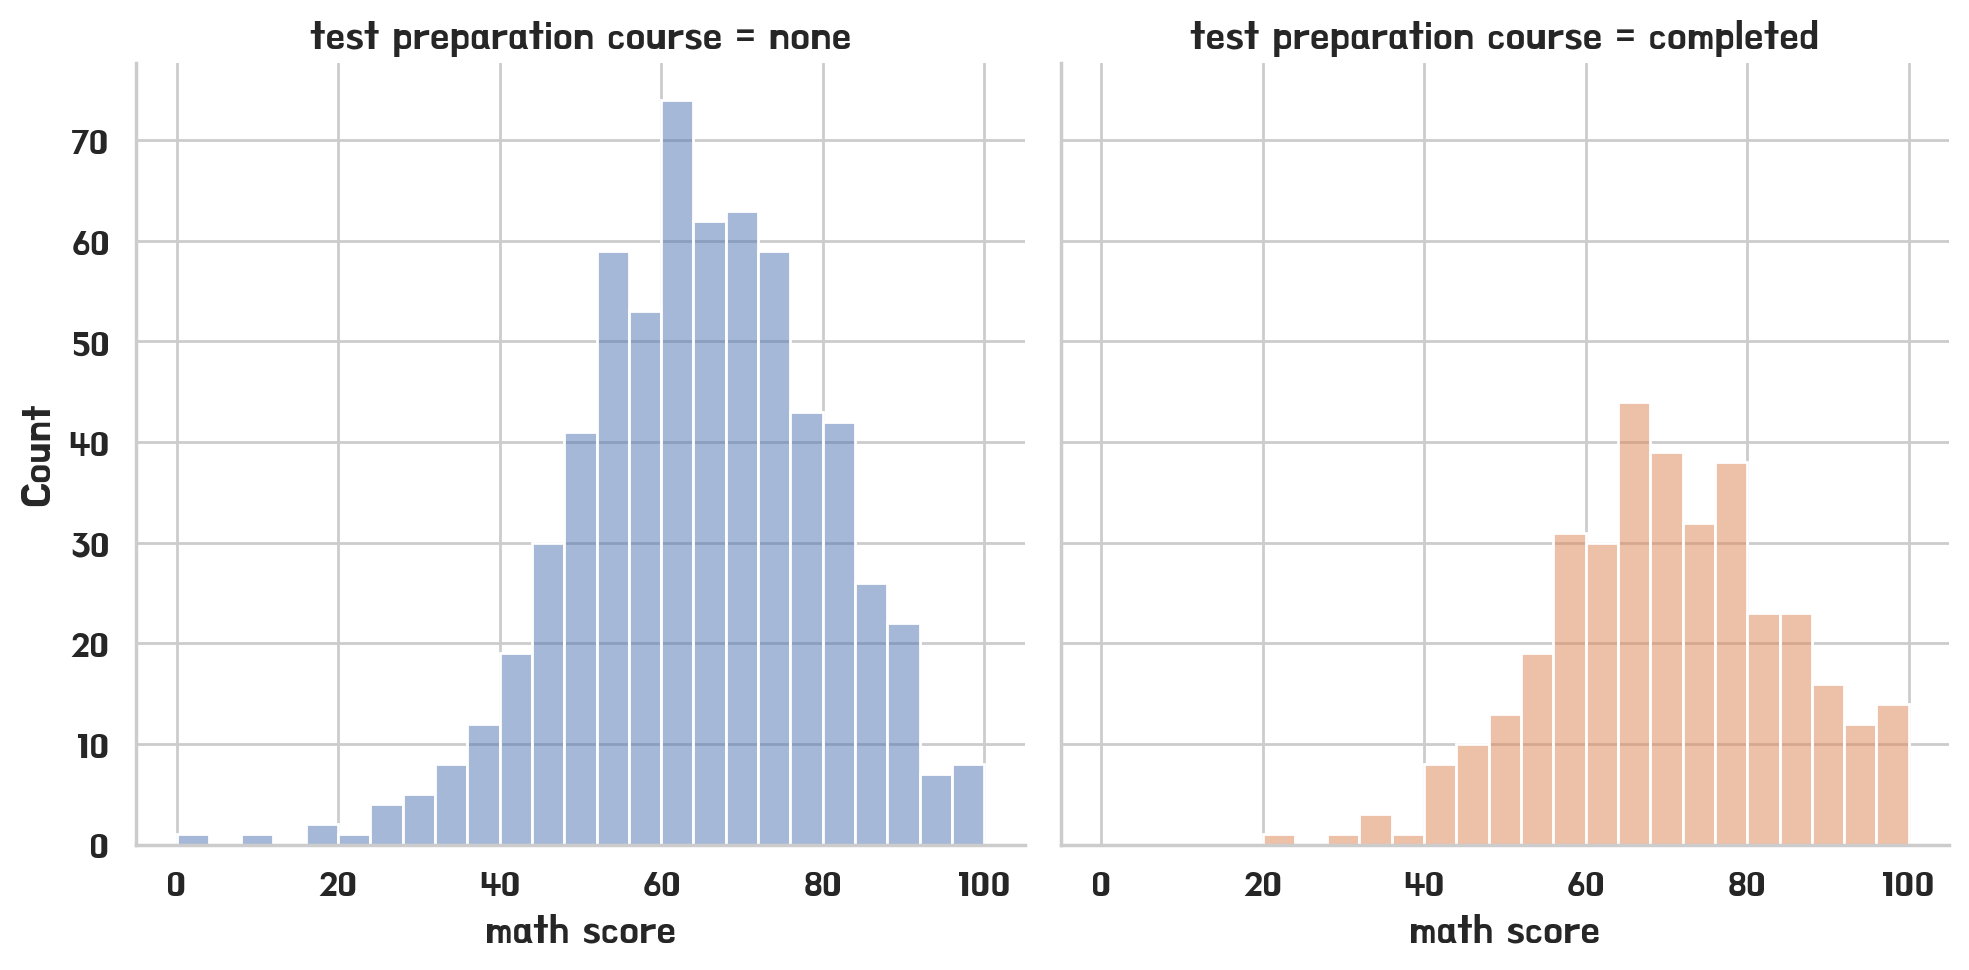

In [21]:
sns.displot(data=data1, x='math score', kind='hist', col='test preparation course', hue='test preparation course', legend=False)

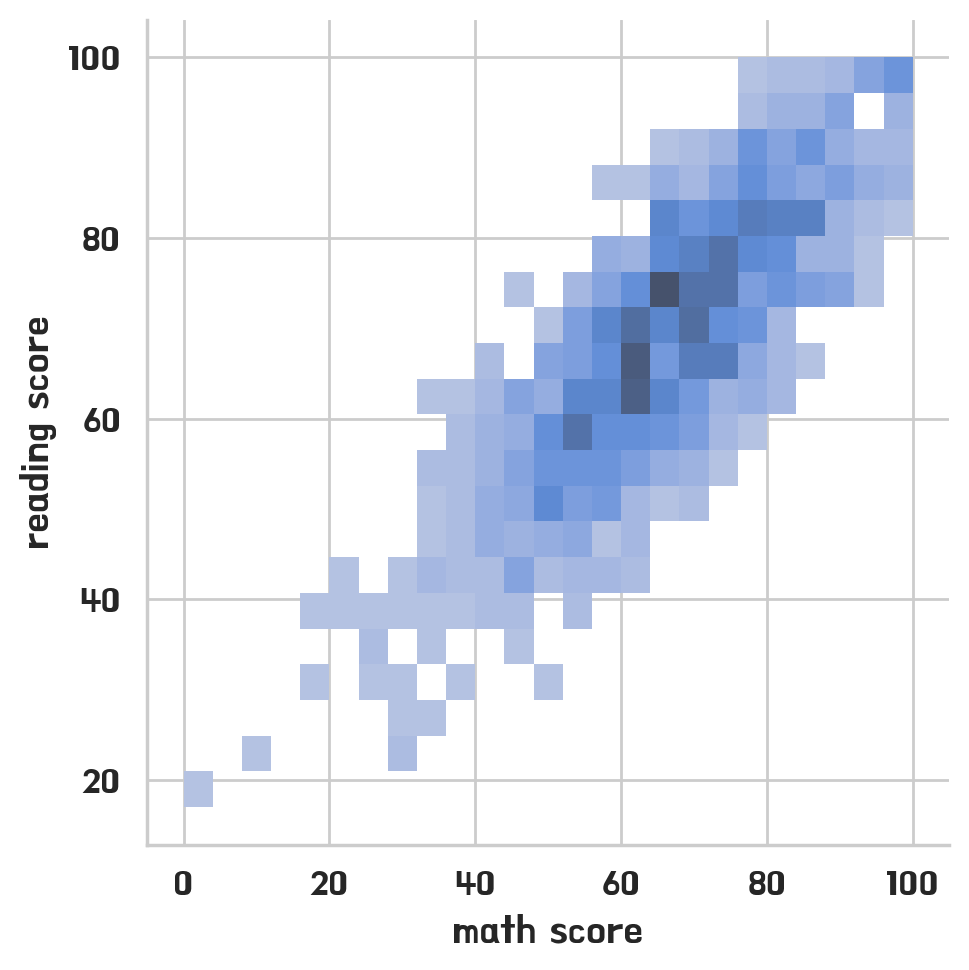

In [22]:
sns.displot(data=data1, x='math score', y='reading score', kind='hist')

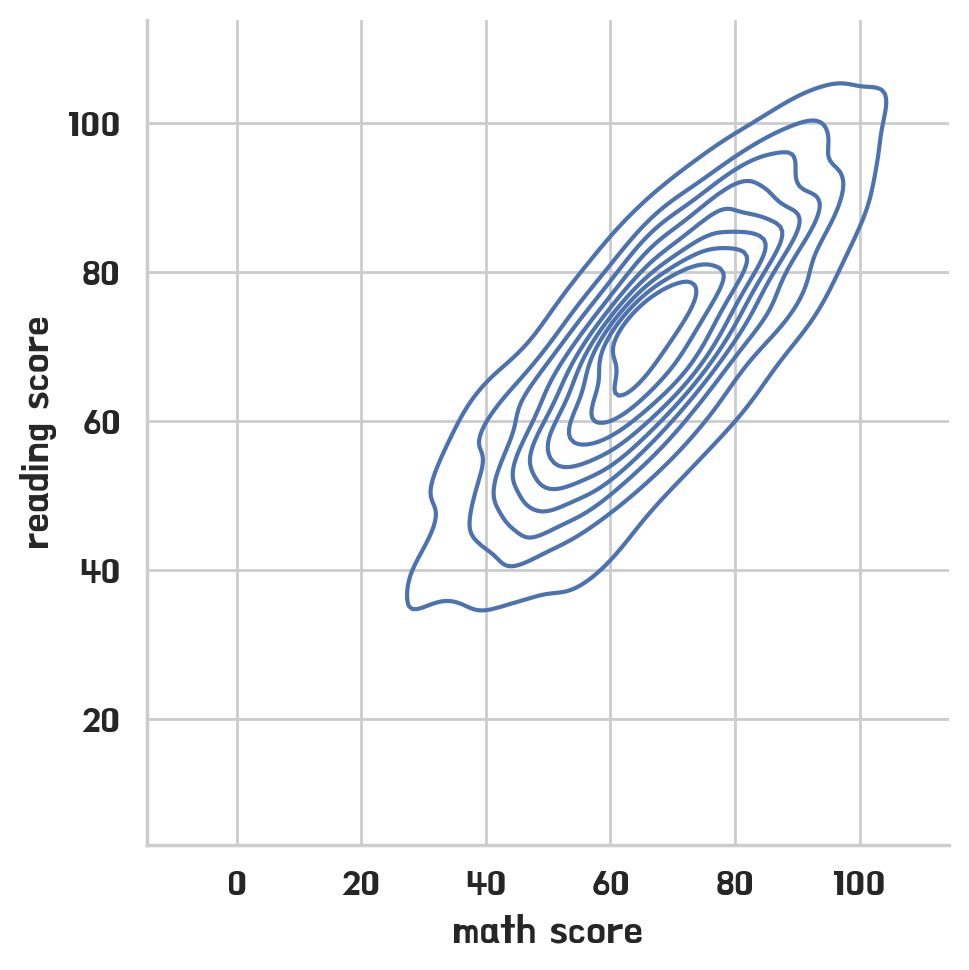

In [23]:
sns.displot(data=data1, x='math score', y='reading score', kind='kde')

In [24]:
unicorn_df = pd.read_csv("../data/unicorn_startups.csv")
unicorn_df

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
...,...,...,...,...,...,...,...,...,...,...
931,YipitData,1.0,12/6/2021,United States,New York,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,6,12
932,Anyscale,1.0,12/7/2021,United States,Berkeley,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12
933,Iodine Software,1.0,12/1/2021,United States,Austin,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,12
934,ReliaQuest,1.0,12/1/2021,United States,Tampa,Cybersecurity,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,12


In [25]:
# 각 컬럼의 고윳값 확인
for col in unicorn_df.columns:
    unique_values = unicorn_df[col].unique()
    unique_str = ', '.join(map(str, unique_values[:5]))  # 처음 5개만 표시
    if len(unique_values) > 10:
        unique_str += ", ..."  # 너무 많으면 생략 표시
    print(f"{col:<15}: {unique_str}")

Company        : Bytedance, SpaceX, Stripe, Klarna, Canva, ...
Valuation      : 140.0, 100.3, 95.0, 45.6, 40.0, ...
Date           : 4/7/2017, 12/1/2012, 1/23/2014, 12/12/2011, 1/8/2018, ...
Country        : China, United States, Sweden, Australia, United Kingdom, ...
City           : Beijing, Hawthorne, San Francisco, Stockholm, Surry Hills, ...
Industry       : Artificial intelligence, Other, Fintech, Internet software & services, Supply chain, logistics, & delivery, ...
Investors      : 0      Sequoia Capital China, SIG Asia Investments, S...
1      Founders Fund, Draper Fisher Jurvetson, Rothen...
2            Khosla Ventures, LowercaseCapital, capitalG
3      Institutional Venture Partners, Sequoia Capita...
4      Sequoia Capital China, Blackbird Ventures, Mat...
5      Khosla Ventures, Kleiner Perkins Caufield & By...
6      Andreessen Horowitz, New Enterprise Associates...
7             index Ventures, DST Global, Ribbit Capital
8      Sequoia Capital, Redpoint e.ventures, Kasz

In [41]:
temp1 = unicorn_df.groupby(['year', 'Country'])['Company'].count().reset_index()
temp1 = temp.rename(columns={'Company' : 'Number of Unicorn Startups'})

In [42]:
data3 = temp1.query('Country in ["China", "United States"]')

sns.relplot(data=data3, x='year', y='Number of Unicorn Startups', kind='line', col='Country')
plt.show()

TypeError: dtype 'Number of Unicorn Startups    object
Number of Unicorn Startups     int64
dtype: object' not understood

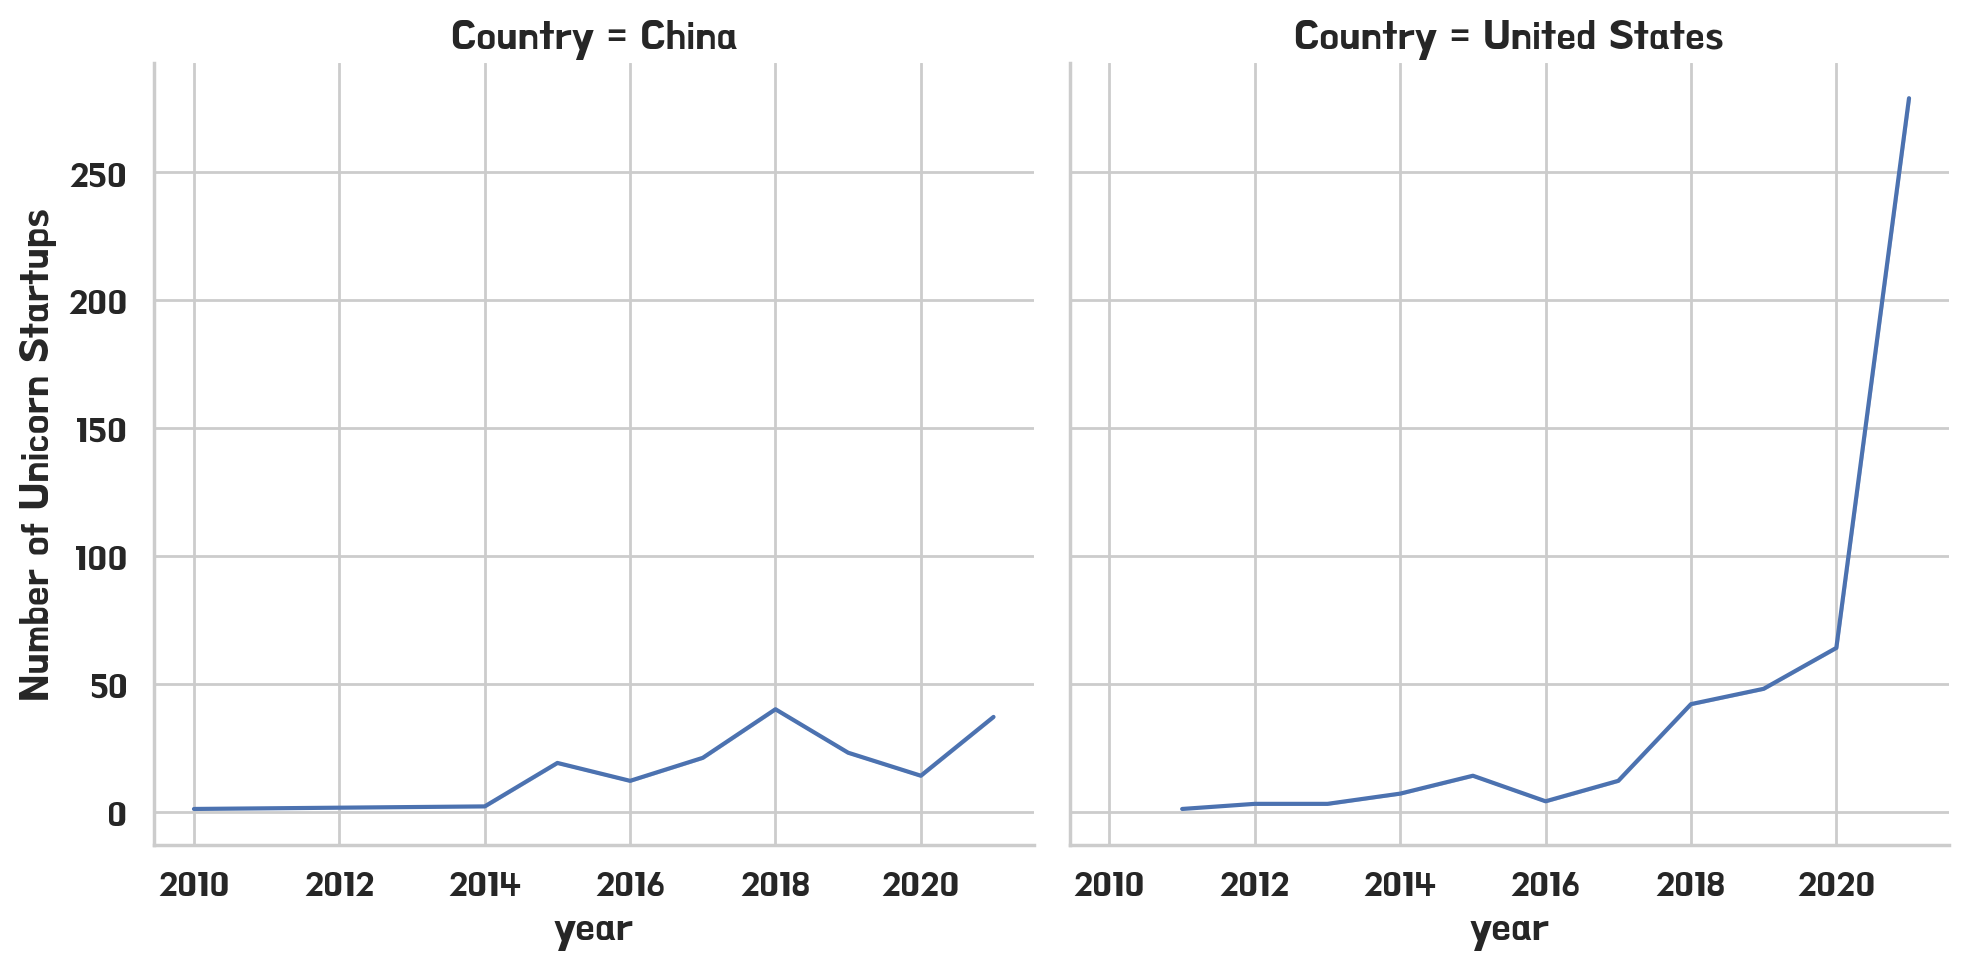

In [35]:
unicorn_df['Number of Unicorn Startups'] = unicorn_df.groupby(['year', 'Country'])['Company'].transform('count')

temp = unicorn_df.query('Country in ["China", "United States"]')

sns.relplot(data=temp, x='year', y='Number of Unicorn Startups', kind='line', col='Country')

In [36]:
temp

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day,Number of Unicorn Startups
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4,21
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12,3
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1,7
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12,7
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2,48
...,...,...,...,...,...,...,...,...,...,...,...
929,Lessen,1.0,11/30/2021,United States,Scottsdale,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,30,11,279
931,YipitData,1.0,12/6/2021,United States,New York,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,6,12,279
932,Anyscale,1.0,12/7/2021,United States,Berkeley,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12,279
933,Iodine Software,1.0,12/1/2021,United States,Austin,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,12,279


In [49]:
c1 = temp.groupby(['year', 'Country'])['Number of Unicorn Startups'].count().reset_index()
c1

,year,Country,Number of Unicorn Startups
0,2010,China,1
1,2011,United States,1
2,2012,United States,3
3,2013,United States,3
4,2014,China,2
5,2014,United States,7
6,2015,China,19
7,2015,United States,14
8,2016,China,12
9,2016,United States,4


In [52]:
temp1 = unicorn_df.groupby(['year', 'Country'])['Company'].count().reset_index()
temp1 = temp1.rename(columns={'Company' : 'Number of Unicorn Startups'})
c2 = temp1.query('Country in ["China", "United States"]')
c2

,year,Country,Number of Unicorn Startups
1,2010,China,1
3,2011,United States,1
5,2012,United States,3
6,2013,United States,3
7,2014,China,2
10,2014,United States,7
11,2015,China,19
16,2015,United States,14
17,2016,China,12
24,2016,United States,4
